# A deep learning model for heart disease prediction using the heart disease dataset from UCI Machine Learning Repository


**Data analysis and preprocessing**

csv data was converted to pandas dataframe
id and dataset columns were removed

sex, cp, fbs, restecg, exang, slope and thal columns were converted to numerical label

Numerical missing values were replaced with Median, Binary missing values were replaced with mode and categorical missing values were also replaced with mode

num column is the label. 0 represents no heart disease. Converted 1 and 2 to 1 representing low to moderate risk and 3 and 4 to 2 representing moderate to high risk. So it becomes a multi class(3) classification problem


**Changes:**
Making it a 3 class classification problem made the dataset imbalanced as there were way too many no-disease class than others classes and the model was giving a maximum of 77% accuracy. So I converted the problem into a binary classification problem and as a result, the accuracy improved




In [272]:
import pandas as pd

In [273]:
dataset = pd.read_csv('/content/heart_disease_uci.csv')

In [274]:
dataset.shape

(920, 16)

In [275]:
dataset.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [276]:
dataset.drop(['id', 'dataset'], axis=1, inplace=True)

In [277]:
dataset['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [278]:
dataset.loc[dataset['sex']=='Male', 'sex'] = 1
dataset.loc[dataset['sex']=='Female', 'sex'] = 2

In [279]:
dataset['sex'].value_counts()

,count
sex,
1,726
2,194


In [280]:
dataset['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [281]:
dataset["cp"] = dataset["cp"].map({
    "asymptomatic": 1,
    "non-anginal": 2,
    "atypical angina": 3,
    "typical angina": 4
})

In [282]:
dataset['cp'].value_counts()

,count
cp,
1,496
2,204
3,174
4,46


In [283]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,4,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,1,1,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,1,1,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,1,2,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,2,3,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [284]:
dataset['fbs'].value_counts()

,count
fbs,
False,692
True,138


In [285]:
dataset["fbs"] = dataset["fbs"].map({False: 1, True: 2})

In [286]:
dataset['fbs'].value_counts()

,count
fbs,
1.0,692
2.0,138


In [287]:
dataset['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


In [288]:
dataset['restecg'] = dataset['restecg'].map({
    'normal':1,
    'lv hypertrophy':2,
    'st-t abnormality':3
})

In [289]:
dataset['restecg'].value_counts()

,count
restecg,
1.0,551
2.0,188
3.0,179


In [290]:
dataset['exang'].value_counts()

,count
exang,
False,528
True,337


In [291]:
dataset['exang'] = dataset["exang"].map({False: 1, True: 2})

In [292]:
dataset['exang'].value_counts()

,count
exang,
1.0,528
2.0,337


In [293]:
dataset['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [294]:
dataset['slope'] = dataset['slope'].map({
    'downsloping':1,
    'flat':2,
    'upsloping':3
})

In [295]:
dataset['slope'].value_counts()

,count
slope,
2.0,345
3.0,203
1.0,63


In [296]:
dataset['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [297]:
dataset["thal"] = dataset["thal"].map({
    "normal": 1,
    "reversable defect": 2,
    "fixed defect": 3
})

In [298]:
dataset['thal'].value_counts()

,count
thal,
1.0,196
2.0,192
3.0,46


In [299]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,4,145.0,233.0,2.0,2.0,150.0,1.0,2.3,1.0,0.0,3.0,0
1,67,1,1,160.0,286.0,1.0,2.0,108.0,2.0,1.5,2.0,3.0,1.0,2
2,67,1,1,120.0,229.0,1.0,2.0,129.0,2.0,2.6,2.0,2.0,2.0,1
3,37,1,2,130.0,250.0,1.0,1.0,187.0,1.0,3.5,1.0,0.0,1.0,0
4,41,2,3,130.0,204.0,1.0,2.0,172.0,1.0,1.4,3.0,0.0,1.0,0


In [300]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [301]:
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()[:15]}")

age: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58]
sex: [1 2]
cp: [4 1 2 3]
trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125.]
chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199.]
fbs: [ 2.  1. nan]
restecg: [ 2.  1.  3. nan]
thalch: [150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162.]
exang: [ 1.  2. nan]
oldpeak: [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1. ]
slope: [ 1.  2.  3. nan]
ca: [ 0.  3.  2.  1. nan]
thal: [ 3.  1.  2. nan]
num: [0 2 1 3 4]


In [302]:
dataset.dtypes

,0
age,int64
sex,object
cp,int64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalch,float64
exang,float64
oldpeak,float64


In [303]:
dataset = dataset.apply(pd.to_numeric)

In [304]:
dataset.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalch,float64
exang,float64
oldpeak,float64


In [305]:
from sklearn.impute import SimpleImputer

In [306]:
imputer = SimpleImputer(strategy="median")
dataset[["trestbps", "chol", "thalch", "oldpeak"]] = imputer.fit_transform(dataset[["trestbps", "chol", "thalch", "oldpeak"]])

In [307]:
imputer = SimpleImputer(strategy="most_frequent")
dataset[["fbs", "exang", "sex"]] = imputer.fit_transform(dataset[["fbs", "exang", "sex"]])

In [308]:
imputer = SimpleImputer(strategy="most_frequent")
dataset[["cp", "restecg", "slope", "ca", "thal"]] = imputer.fit_transform(dataset[["cp", "restecg", "slope", "ca", "thal"]])

In [309]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [310]:
data = dataset.drop('num', axis=1)

In [311]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,1.0,4.0,145.0,233.0,2.0,2.0,150.0,1.0,2.3,1.0,0.0,3.0
1,67,1.0,1.0,160.0,286.0,1.0,2.0,108.0,2.0,1.5,2.0,3.0,1.0
2,67,1.0,1.0,120.0,229.0,1.0,2.0,129.0,2.0,2.6,2.0,2.0,2.0
3,37,1.0,2.0,130.0,250.0,1.0,1.0,187.0,1.0,3.5,1.0,0.0,1.0
4,41,2.0,3.0,130.0,204.0,1.0,2.0,172.0,1.0,1.4,3.0,0.0,1.0


In [312]:
labels = dataset['num']

In [313]:
labels.value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [314]:
labels[(labels>=1) & (labels<=2)] = 1
labels[labels>=3] = 2

/tmp/ipython-input-954680525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[(labels>=1) & (labels<=2)] = 1
/tmp/ipython-input-954680525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels>=3] = 2


In [315]:
labels.value_counts()

,count
num,
0,411
1,374
2,135


In [316]:
labels[labels>0] = 1

/tmp/ipython-input-1157050502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels>0] = 1


In [317]:
labels.value_counts()

,count
num,
1,509
0,411


# Preparing the data for using it in the model

First the data is be split into train and test set

Then the data is be normalized

Then the data is be transformed into TensorDatasets

Then the data is put into DataLoaders with a Batch_size of 16 (Personal Preference)

In [318]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [319]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.85)

In [320]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [321]:
train_data.mean(axis=0)

,0
age,-2.549822e-16
sex,1.885392e-16
cp,5.224579e-17
trestbps,6.405788e-16
chol,7.041824e-17
fbs,2.180694e-16
restecg,8.177602e-17
thalch,-3.975223e-17
exang,4.997423e-17
oldpeak,-4.656690e-17


In [322]:
train_data.std(axis=0)

,0
age,1.0
sex,1.0
cp,1.0
trestbps,1.0
chol,1.0
fbs,1.0
restecg,1.0
thalch,1.0
exang,1.0
oldpeak,1.0


In [323]:
train_data_tensor = torch.tensor(train_data.values, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels.values, dtype=torch.float32).unsqueeze(1)
test_data_tensor = torch.tensor(test_data.values, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels.values, dtype=torch.float32).unsqueeze(1)

In [324]:
train_set = TensorDataset(train_data_tensor, train_labels_tensor)
test_set = TensorDataset(test_data_tensor, test_labels_tensor)

In [325]:
train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=True)

# Building the neural net


The network will contain 3 hidden layers with 16->64->16 nodes in each layer

The there wil 13 inputs in the first layer and 3 outputs in the output layer

Since this is a multiclass classification problem, I will use CrossEntropy loss function

Adam optimizer is selected for optimization

I will use batch normalization since in practice I saw it giving better results

I will also add L2 regularization with the loss function since I believe that some of the selected features are less impactful than others


**Changes**
having 3 hidden layers was redundant as there were only about 900 data entires and 85% of that was used for training and initially the model was overfitting a lot. So I decided have only 1 hidden layer with 32 nodes instead and it improved the performance of the models trained.

But there was still overfitting and I felt like L2 regularization was not doing a proper job. So I removed it and added drop out regularization. I ran an experiment where I found that 50% drop out rate at the hidden layer and 0% to 10% drop out rate at the output layer gave the best result. It makes sense becaue I assumed that hidden layer is where most of the patterns are unpacked (This is just a hunch).

Another crucial change I made is not adding batch normalization which resulted in a smooth learning curve throughout the epochs which is shown below. This aligns with the idea that batch normalization is better for deep networks where in my case, I had only one hidden layer.

I changed the model architecture based on binary classification.

In [326]:
from sklearn.metrics import accuracy_score
import torch.nn.functional as F

In [327]:
def get_model():
  class Net(nn.Module):
    def __init__(self):
      super().__init__()

      self.input = nn.Linear(13, 32)

      self.norm1 = nn.BatchNorm1d(32)
      self.layer1 = nn.Linear(32, 32)

      self.normF = nn.BatchNorm1d(32)
      self.output = nn.Linear(32, 1)


    def forward(self, x):
      x = torch.relu(self.input(x))
      x = F.dropout(x, p=0.5, training=self.training)

      # x = self.norm1(x)
      x = torch.relu(self.layer1(x))
      x = F.dropout(x, p=0.1, training=self.training)

      # x = self.normF(x)
      x = self.output(x)

      return x

  model = Net()
  loss_function = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

  return model, loss_function, optimizer




In [328]:
def train_model():
  epochs = 500
  train_acc = []
  test_acc = []
  model, loss_function, optimizer = get_model()

  for i in range(epochs):
    model.train()
    for x, y in train_loader:
      y_pred = model(x)
      loss = loss_function(y_pred, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


    model.eval()
    with torch.no_grad():
      x, y = train_loader.dataset.tensors
      y_pred = torch.sigmoid(model(x)).detach().numpy().round()
      train_acc.append(accuracy_score(y_pred, y.detach().numpy()))

      x, y = test_loader.dataset.tensors
      y_pred = torch.sigmoid(model(x)).detach().numpy().round()
      test_acc.append(accuracy_score(y_pred, y.detach().numpy()))



  return model, train_acc, test_acc



In [339]:
net, train_acc, test_acc = train_model()

# Visualizing the result

In [330]:
import matplotlib.pyplot as plt

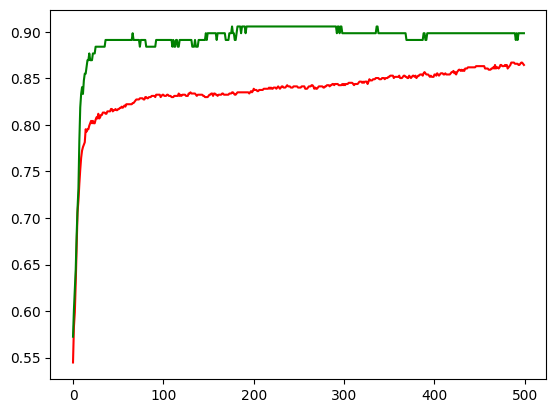

In [340]:
plt.plot(train_acc, 'red')
plt.plot(test_acc, 'green')

In [336]:
np.mean(test_acc[-100:-1])

np.float64(0.9071878202312986)

In [337]:
for i in range (10):
  model, train_acc, test_acc = train_model()
  trn_acc = np.mean(train_acc[-50:-1])
  tst_acc = np.mean(test_acc[-50:-1])
  print(f"Model {i+1} has a train accuracy of {trn_acc*100}% and a test accuracy of {tst_acc*100}%")

Model 1 has a train accuracy of 85.53421368547419% and a test accuracy of 91.36350192250812%
Model 2 has a train accuracy of 86.65640169111123% and a test accuracy of 89.13043478260869%
Model 3 has a train accuracy of 86.05616159507281% and a test accuracy of 89.0860692102928%
Model 4 has a train accuracy of 85.39850722897854% and a test accuracy of 88.45016267376516%
Model 5 has a train accuracy of 86.71903544026308% and a test accuracy of 90.47619047619048%
Model 6 has a train accuracy of 86.14750247925257% and a test accuracy of 89.85507246376812%
Model 7 has a train accuracy of 85.3750195730466% and a test accuracy of 88.79029872818691%
Model 8 has a train accuracy of 86.42152513179184% and a test accuracy of 88.53889381839693%
Model 9 has a train accuracy of 86.08486873010074% and a test accuracy of 89.75155279503105%
Model 10 has a train accuracy of 86.06660055326478% and a test accuracy of 89.85507246376812%
